## Data : 
<br>https://www.kaggle.com/uciml/sms-spam-collection-dataset
<br>https://github.com/udacity/br-machine-learning/tree/master/projects/practice_projects/naive_bayes_tutorial

Reference : <br>
https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling <br>
https://www.kaggle.com/larui529/spam-vs-ham-text-filter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
data = df

In [5]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [6]:
data = data.rename(columns={'v1':'label', 'v2':'text'})

In [7]:
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [9]:
data.label.count()

5572

In [10]:
df.shape

(5572, 5)

In [11]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


### Converting Words to Numbers

In [12]:
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [13]:
data

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [104]:
category_count = pd.DataFrame()
category_count['count'] = data['label'].value_counts()

In [105]:
category_count

,count
ham,4825
spam,747


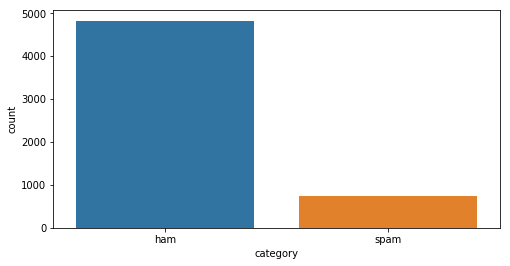

In [107]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(x = category_count.index, y = category_count['count'], ax = ax)
ax.set_ylabel('count', fontsize = 10)
ax.set_xlabel('category',fontsize = 10)
ax.tick_params(labelsize=10)


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data['label_num'], test_size = 0.2, random_state = 42)
#X_train,X_test,y_train,y_test = train_test_split(data['text'], data['label'], test_size = 0.2, random_state = 42)

In [16]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(1115,)
(4457,)
(1115,)
(4457,)


### Text Transformation - NLP

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vect = CountVectorizer()

In [19]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [20]:
print(vect.get_feature_names()[0:20])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578']


In [21]:
print(vect.get_feature_names()[-20:])

['zogtorius', 'zoom', 'zouk', 'åè10', 'åð', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell']


In [22]:
X_train_df = vect.transform(X_train)

In [23]:
X_train_df

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [24]:
X_test_df = vect.transform(X_test)

In [25]:
X_test_df

<1115x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 13941 stored elements in Compressed Sparse Row format>

In [26]:
type(X_test_df)

scipy.sparse.csr.csr_matrix

### Data Visualisation

In [27]:
ham_words = ''
spam_words = ''
ham = data[data.label_num == 0]
spam = data[data.label_num == 1]

In [28]:
import nltk
from nltk.corpus import stopwords

In [29]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        ham_words = ham_words + words + ' '        

In [30]:
from wordcloud import WordCloud

In [31]:
# Generating Wordcloud

spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

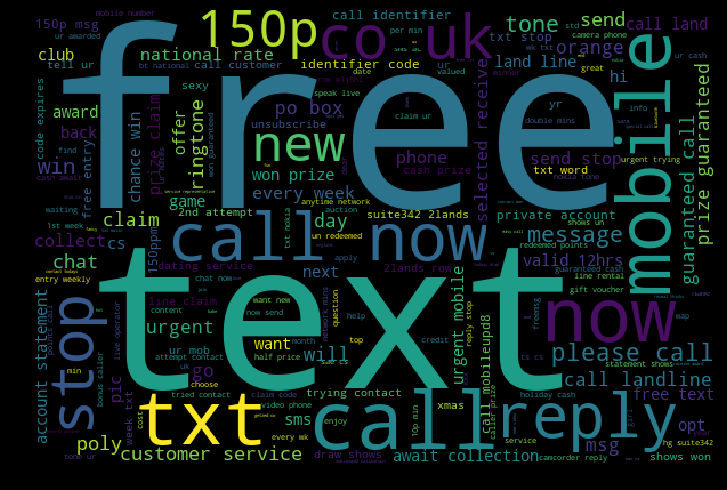

In [32]:
# spam_wordcloud

plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

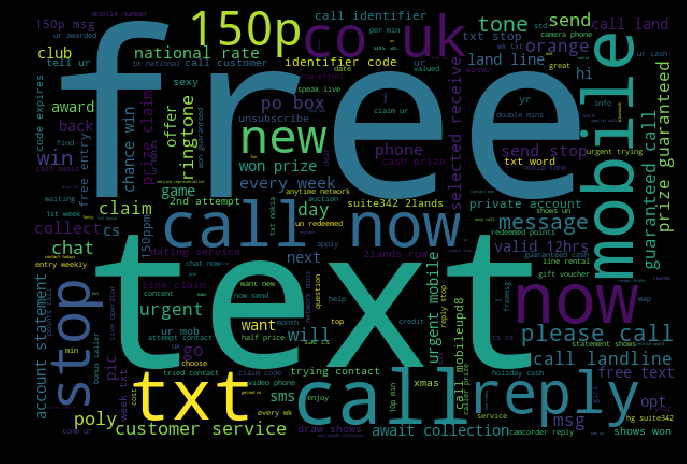

In [33]:
# spam_wordcloud

plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis('on')
plt.tight_layout(pad=2)
plt.show()

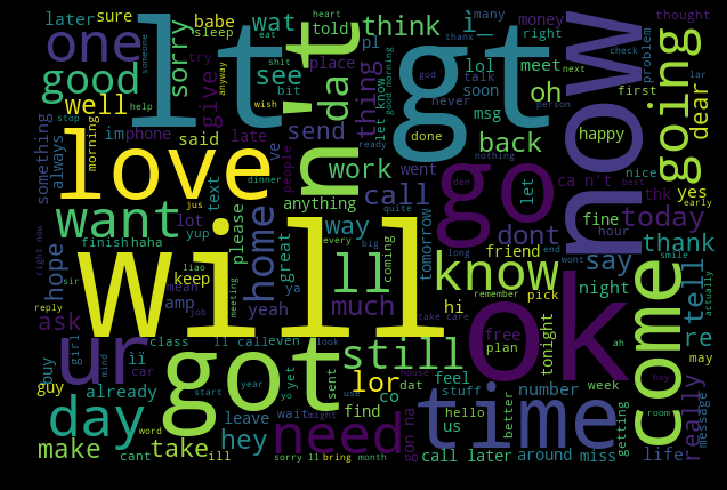

In [34]:
# ham_wordcloud

plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
%whos

Variable           Type                Data/Info
------------------------------------------------
CountVectorizer    type                <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
WordCloud          type                <class 'wordcloud.wordcloud.WordCloud'>
X_test             Series              3245    Funny fact Nobody<...>ngth: 1115, dtype: object
X_test_df          csr_matrix            (0, 1808)	1\n  (0, 2759<...>5247)	1\n  (1114, 7679)	1
X_train            Series              1978    No I'm in the sam<...>ngth: 4457, dtype: object
X_train_df         csr_matrix            (0, 1105)	1\n  (0, 1415<...>4823)	1\n  (4456, 7558)	1
data               DataFrame                label               <...>\n[5572 rows x 3 columns]
df                 DataFrame                   v1               <...>\n[5572 rows x 5 columns]
ham                DataFrame                label               <...>\n[4825 rows x 3 columns]
ham_wordcloud      WordCloud           <wordcloud.wordcloud.Wor

# Building ML Models

## Multinomial NB

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
prediction = dict()

In [38]:
model = MultinomialNB()

In [39]:
X_train_df

<4457x7735 sparse matrix of type '<class 'numpy.int64'>'
	with 58978 stored elements in Compressed Sparse Row format>

In [40]:
model.fit(X_train_df, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
prediction['MultinomialNB'] = model.predict(X_test_df)

In [42]:
prediction

{'MultinomialNB': array([0, 0, 1, ..., 0, 0, 1], dtype=int64)}

In [43]:
accuracy_score(y_test, prediction['MultinomialNB'])

0.9838565022421525

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
prediction['LogisticReg'] = model.predict(X_test_df)

In [48]:
accuracy_score(y_test, prediction['LogisticReg'])

0.97847533632287

## KNN Classification

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model = KNeighborsClassifier(n_neighbors= 5)

In [51]:
model.fit(X_train_df, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
prediction['KNN'] = model.predict(X_test_df)

In [53]:
accuracy_score(y_test, prediction['KNN'])

0.9192825112107623

## Ensemble Classifier (Random Forest Classifier)

In [54]:
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda\envs\py35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
model = RandomForestClassifier()

In [56]:
model.fit(X_train_df, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
prediction['random_forest'] = model.predict(X_test_df)

In [58]:
accuracy_score(y_test, prediction['random_forest'])

0.9766816143497757

## Ensemble Classifier (Adaboost)

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
model = AdaBoostClassifier()

In [61]:
model.fit(X_train_df, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [62]:
prediction['adaboost'] = model.predict(X_test_df)

In [63]:
accuracy_score(y_test, prediction['adaboost'])

0.967713004484305

## Parameter tuning using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
k_range = np.arange(1, 30)

In [66]:
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [67]:
param_grid = dict(n_neighbours = k_range)

In [68]:
print(param_grid)

{'n_neighbours': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [69]:
model = KNeighborsClassifier(n_neighbors=5)

In [70]:
grid = GridSearchCV(model, param_grid= param_grid)

In [71]:
grid

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbours': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
#grid.fit(X_train_df,y_train)


In [74]:
print(classification_report(y_test, prediction['MultinomialNB'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.98      1.00      0.99       965
       Spam       0.99      0.89      0.94       150

avg / total       0.98      0.98      0.98      1115



In [82]:
conf_matrix = confusion_matrix(y_test, prediction['MultinomialNB'])

In [83]:
conf_matrix

array([[963,   2],
       [ 16, 134]], dtype=int64)

In [86]:
conf_mat_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

In [87]:
conf_mat_norm

array([[0.99792746, 0.00207254],
       [0.10666667, 0.89333333]])

Text(0.5,15,'Predicted label')

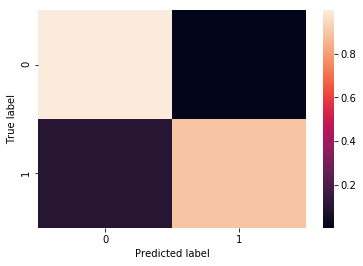

In [94]:
sns.heatmap(conf_mat_norm)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## identifying the Misclassified Points

In [96]:
# Increase the pandas dataframe width to display the misclassified texts in full width.
pd.set_option('display.max_colwidth', -1)

In [98]:
conf_matrix = confusion_matrix(y_test, prediction['MultinomialNB'])
conf_matrix

array([[963,   2],
       [ 16, 134]], dtype=int64)

In [99]:
# Misclassfied as Spam
X_test[y_test < prediction["MultinomialNB"]]

4700    I liked the new mobile                                                                           
5044    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Name: text, dtype: object

In [100]:
# Misclassfied as Ham
X_test[y_test > prediction["MultinomialNB"]]

683     Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+     
3979    ringtoneking 84484                                                                                                                                                 
1268    Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA                
730     Email AlertFrom: Jeri StewartSize: 2KBSubject: Low-cost prescripiton drvgsTo listen to email call 123                                                              
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                                 
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a